# BMEN 509 - Lab 2


##### UCID: 30088413
#### Name: Ibrahim Asad

## Introduction

The purpose of this Lab is to become familiar with the frequency domain of images using Discrete Fourier Transformations. The Lab will focus on calculating, displaying, manipulating components, and as well as creating filters for the images to remove artifacts in images. 


In [1]:
# Library Imports
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy import signal, ndimage
from mpl_toolkits.mplot3d import Axes3D

# Interactivity
from ipywidgets import interactive

# Setup Jupyter notebook specifics
%matplotlib inline

# Numpy printing help
np.set_printoptions(precision=2)

# Constants
data_directory = os.path.join('.', 'Data')
file_names = [
    'BreastUltrasound5.tif', 'T1Weighted8.jpg',
    'Thorax_PD.png', 'calcs_grids.tiff',
    'knee_ct2.tif', 'knee_xray2.tif',
    'mri_T2.tif', 'mri_brain.tif',
    'mri_pd.tif'
]


# Verify we can find our files
for file_name in file_names:
    name = os.path.join(data_directory, file_name)
    if not os.path.isfile(name):
        os.sys.exit('Cannot find file {}. Please make sure you have downloaded the data'.format(name))
print('Found all image files!')

Found all image files!


# Section 3

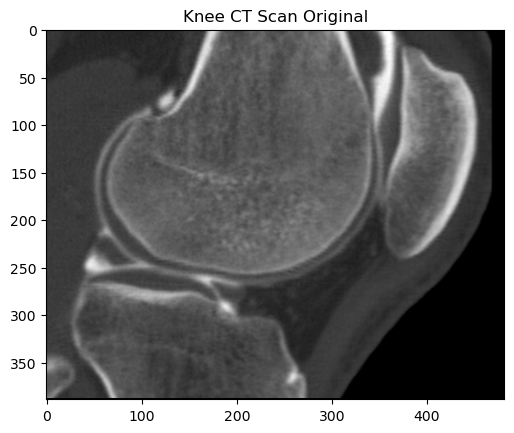

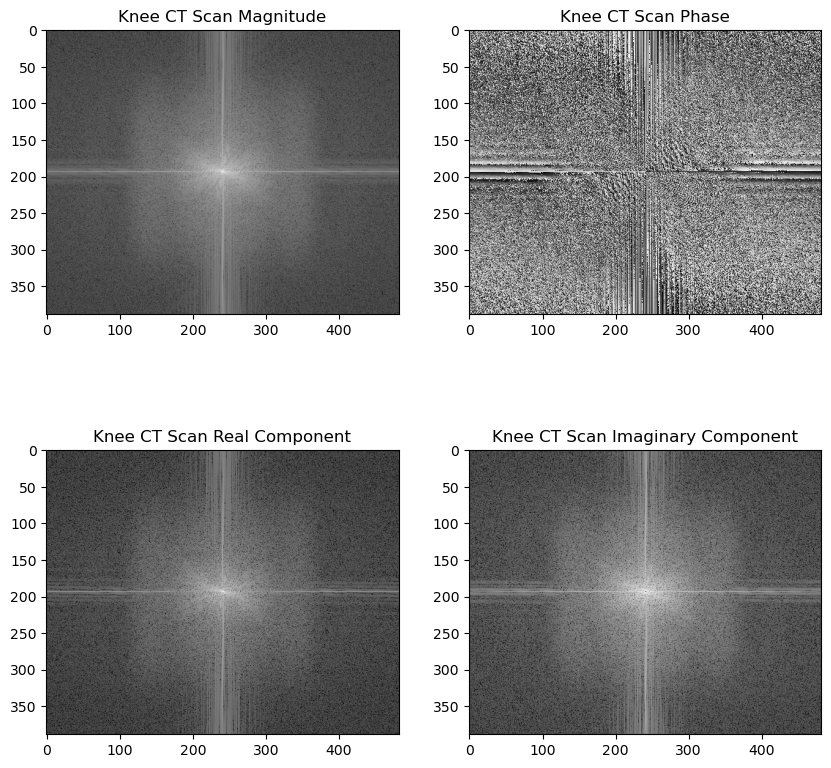

In [2]:
# Read the image
file_name = 'knee_ct2.tif'
image = io.imread(os.path.join(data_directory, file_name))
plt.imshow(image, cmap='gray')
plt.title('Knee CT Scan Original')
plt.show()

# Let's compute the DFT
dft = np.fft.fftshift(np.fft.fft2(image))


# For the magnitude, we do a log-transform. We add one to prevent log(0) -> infinity.
# We also divide by the maximum response in the image to normalize the image.
mag = np.log(np.abs(dft)+1);
mag = mag / np.log(np.max(np.abs(dft.ravel())+1))

# There is really nothing to do for the phase. Here, the phase has been
# rescaled to [0, 2*pi). It is absolutely valid to use angle(.) without rescaling.
phase = (np.angle(dft) + np.pi) / (2*np.pi);

# For the real component, we again scale by the log and the maximum
# response in the image. However, we take the absolute value. This changes
# the interpretation of the image because you make negative values positive.
real = np.log(np.abs(np.real(dft))+1) / np.log(np.max(np.abs(np.real(dft.ravel())) + 1))
imag = np.log(np.abs(np.imag(dft))+1) / np.log(np.max(np.abs(np.imag(dft.ravel())) + 1))

# For imshow, we quickly need to convert everything to float
mag = mag.astype(np.double)
phase = phase.astype(np.double)
real = real.astype(np.double)
imag = imag.astype(np.double)

# And plot!
plt.subplots(2, 2, figsize=(10, 10))
plt.subplot(2,2,1); plt.imshow(mag, cmap='gray');   plt.title('Knee CT Scan Magnitude');
plt.subplot(2,2,2); plt.imshow(phase, cmap='gray'); plt.title('Knee CT Scan Phase');
plt.subplot(2,2,3); plt.imshow(real, cmap='gray');  plt.title('Knee CT Scan Real Component');
plt.subplot(2,2,4); plt.imshow(imag, cmap='gray');  plt.title('Knee CT Scan Imaginary Component');
plt.show()



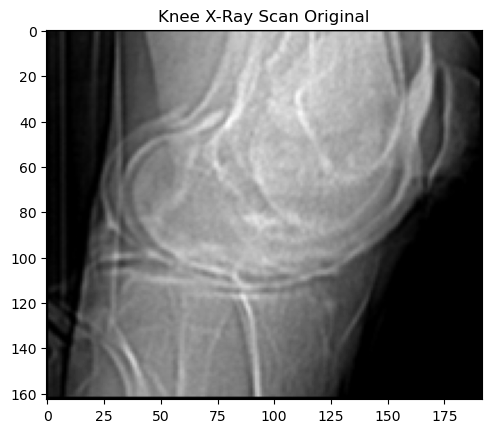

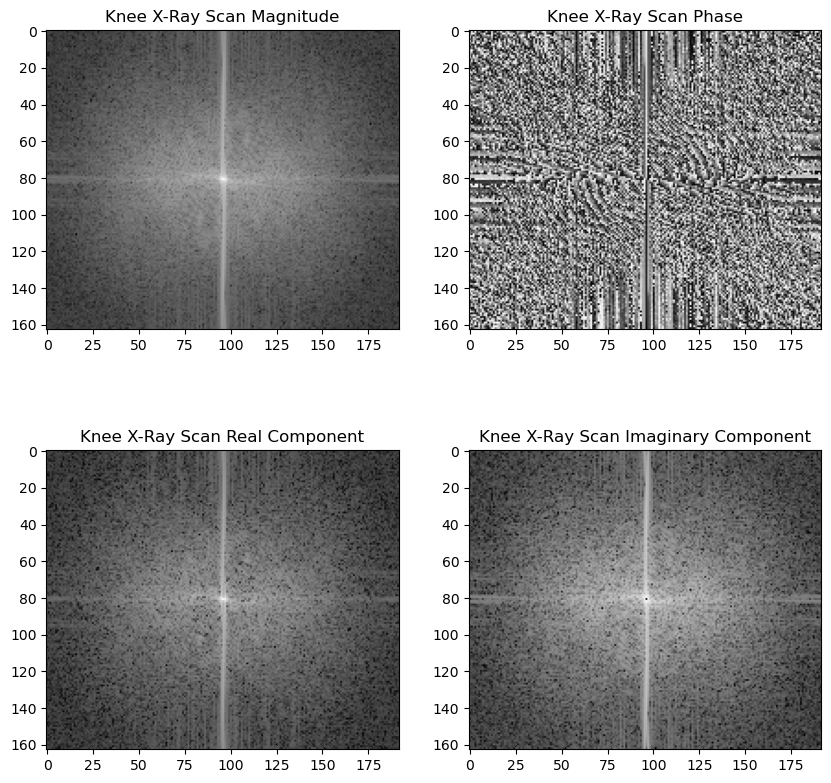

In [3]:
# Read the image
file_name = 'knee_xray2.tif'
image = io.imread(os.path.join(data_directory, file_name))
plt.imshow(image, cmap='gray')
plt.title('Knee X-Ray Scan Original')
plt.show()

# Let's compute the DFT
dft = np.fft.fftshift(np.fft.fft2(image))


# For the magnitude, we do a log-transform. We add one to prevent log(0) -> infinity.
# We also divide by the maximum response in the image to normalize the image.
mag = np.log(np.abs(dft)+1);
mag = mag / np.log(np.max(np.abs(dft.ravel())+1))

# There is really nothing to do for the phase. Here, the phase has been
# rescaled to [0, 2*pi). It is absolutely valid to use angle(.) without rescaling.
phase = (np.angle(dft) + np.pi) / (2*np.pi);

# For the real component, we again scale by the log and the maximum
# response in the image. However, we take the absolute value. This changes
# the interpretation of the image because you make negative values positive.
real = np.log(np.abs(np.real(dft))+1) / np.log(np.max(np.abs(np.real(dft.ravel())) + 1))
imag = np.log(np.abs(np.imag(dft))+1) / np.log(np.max(np.abs(np.imag(dft.ravel())) + 1))

# For imshow, we quickly need to convert everything to float
mag = mag.astype(np.double)
phase = phase.astype(np.double)
real = real.astype(np.double)
imag = imag.astype(np.double)

# And plot!
plt.subplots(2, 2, figsize=(10, 10))
plt.subplot(2,2,1); plt.imshow(mag, cmap='gray');   plt.title('Knee X-Ray Scan Magnitude');
plt.subplot(2,2,2); plt.imshow(phase, cmap='gray'); plt.title('Knee X-Ray Scan Phase');
plt.subplot(2,2,3); plt.imshow(real, cmap='gray');  plt.title('Knee X-Ray Scan Real Component');
plt.subplot(2,2,4); plt.imshow(imag, cmap='gray');  plt.title('Knee X-Ray Scan Imaginary Component');
plt.show()

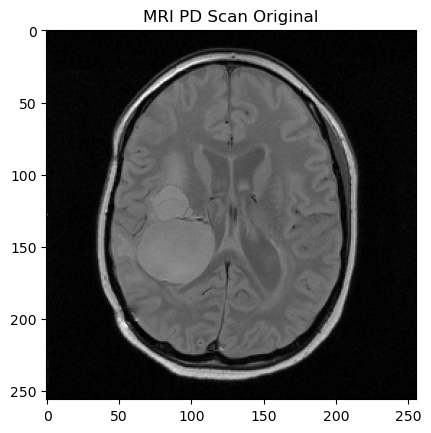

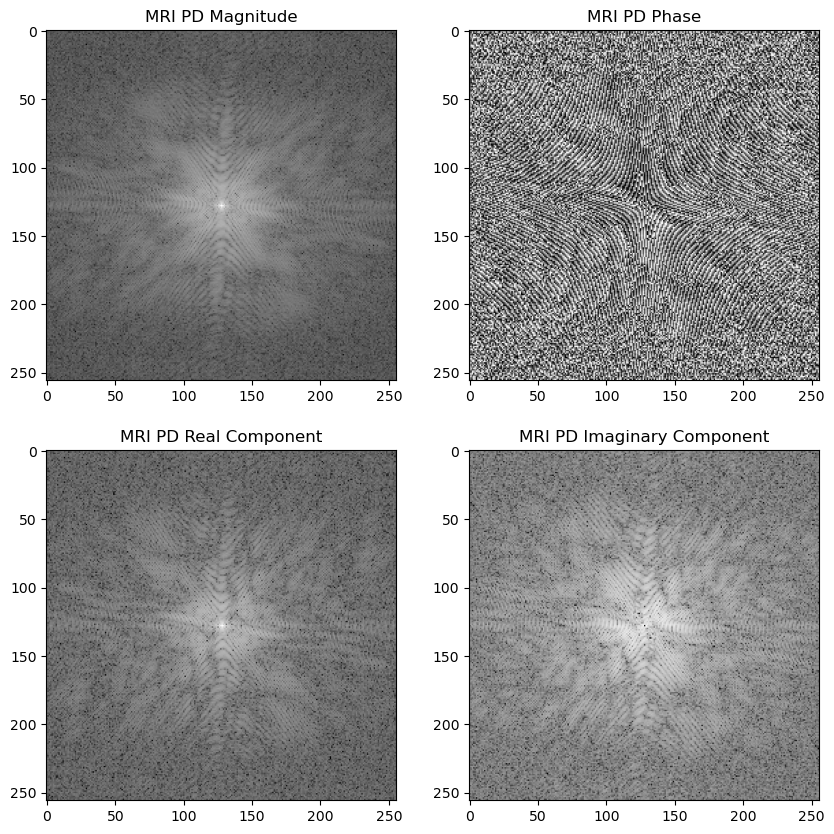

In [4]:
# Read the image
file_name = 'mri_pd.tif'
image = io.imread(os.path.join(data_directory, file_name))
plt.imshow(image, cmap='gray')
plt.title('MRI PD Scan Original')
plt.show()

# Let's compute the DFT
dft = np.fft.fftshift(np.fft.fft2(image))


# For the magnitude, we do a log-transform. We add one to prevent log(0) -> infinity.
# We also divide by the maximum response in the image to normalize the image.
mag = np.log(np.abs(dft)+1);
mag = mag / np.log(np.max(np.abs(dft.ravel())+1))

# There is really nothing to do for the phase. Here, the phase has been
# rescaled to [0, 2*pi). It is absolutely valid to use angle(.) without rescaling.
phase = (np.angle(dft) + np.pi) / (2*np.pi);

# For the real component, we again scale by the log and the maximum
# response in the image. However, we take the absolute value. This changes
# the interpretation of the image because you make negative values positive.
real = np.log(np.abs(np.real(dft))+1) / np.log(np.max(np.abs(np.real(dft.ravel())) + 1))
imag = np.log(np.abs(np.imag(dft))+1) / np.log(np.max(np.abs(np.imag(dft.ravel())) + 1))

# For imshow, we quickly need to convert everything to float
mag = mag.astype(np.double)
phase = phase.astype(np.double)
real = real.astype(np.double)
imag = imag.astype(np.double)

# And plot!
plt.subplots(2, 2, figsize=(10, 10))
plt.subplot(2,2,1); plt.imshow(mag, cmap='gray');   plt.title('MRI PD Magnitude');
plt.subplot(2,2,2); plt.imshow(phase, cmap='gray'); plt.title('MRI PD Phase');
plt.subplot(2,2,3); plt.imshow(real, cmap='gray');  plt.title('MRI PD Real Component');
plt.subplot(2,2,4); plt.imshow(imag, cmap='gray');  plt.title('MRI PD Imaginary Component');
plt.show()

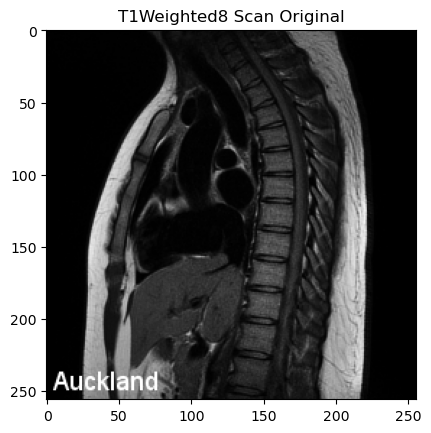

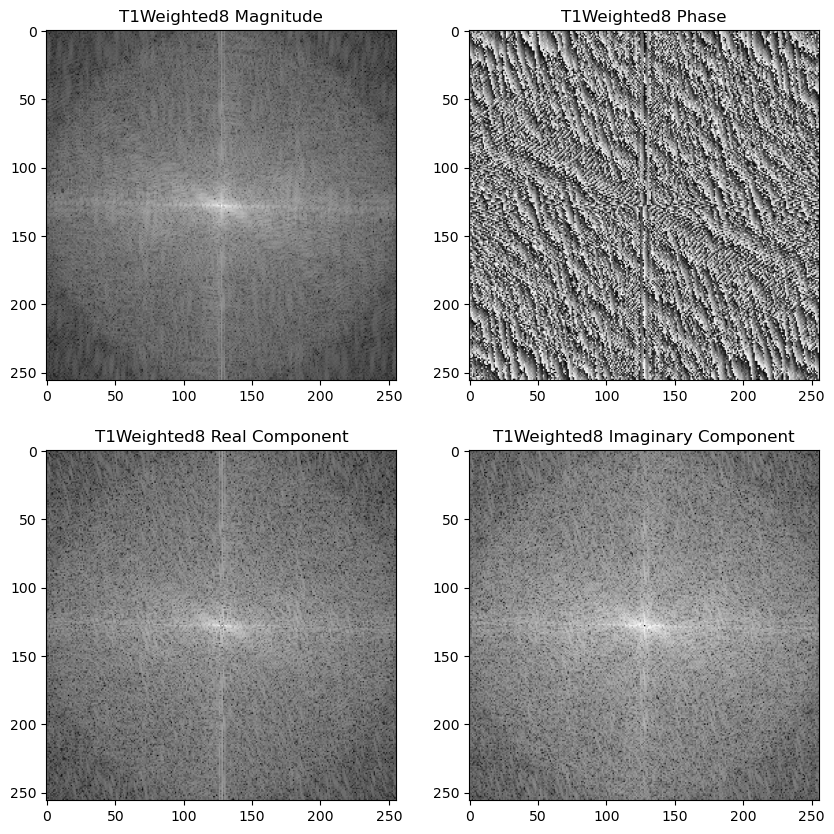

In [5]:
# Read the image
file_name = 'T1Weighted8.jpg'
image = io.imread(os.path.join(data_directory, file_name))
plt.imshow(image, cmap='gray')
plt.title('T1Weighted8 Scan Original')
plt.show()

# Let's compute the DFT
dft = np.fft.fftshift(np.fft.fft2(image))


# For the magnitude, we do a log-transform. We add one to prevent log(0) -> infinity.
# We also divide by the maximum response in the image to normalize the image.
mag = np.log(np.abs(dft)+1);
mag = mag / np.log(np.max(np.abs(dft.ravel())+1))

# There is really nothing to do for the phase. Here, the phase has been
# rescaled to [0, 2*pi). It is absolutely valid to use angle(.) without rescaling.
phase = (np.angle(dft) + np.pi) / (2*np.pi);

# For the real component, we again scale by the log and the maximum
# response in the image. However, we take the absolute value. This changes
# the interpretation of the image because you make negative values positive.
real = np.log(np.abs(np.real(dft))+1) / np.log(np.max(np.abs(np.real(dft.ravel())) + 1))
imag = np.log(np.abs(np.imag(dft))+1) / np.log(np.max(np.abs(np.imag(dft.ravel())) + 1))

# For imshow, we quickly need to convert everything to float
mag = mag.astype(np.double)
phase = phase.astype(np.double)
real = real.astype(np.double)
imag = imag.astype(np.double)

# And plot!
plt.subplots(2, 2, figsize=(10, 10))
plt.subplot(2,2,1); plt.imshow(mag, cmap='gray');   plt.title('T1Weighted8 Magnitude');
plt.subplot(2,2,2); plt.imshow(phase, cmap='gray'); plt.title('T1Weighted8 Phase');
plt.subplot(2,2,3); plt.imshow(real, cmap='gray');  plt.title('T1Weighted8 Real Component');
plt.subplot(2,2,4); plt.imshow(imag, cmap='gray');  plt.title('T1Weighted8 Imaginary Component');
plt.show()

#### Section 3

Both the magnitude and phase values are complex numbers as generalized by the the fourier transformation. They are both used as function for frequency and therfore can be changed as frequecys alter. Scaling is requeired at times because complex numbers can imaginary or undefined numbers such as the root of -5 or log(0) so therefore some scaling is required. 

## Section 4

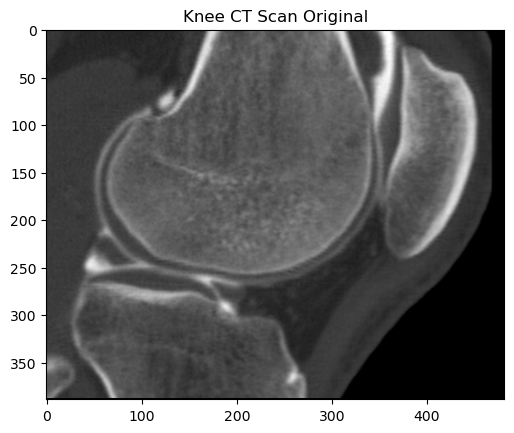

/var/folders/tm/sspyv08j21q74x7dxt8th_l00000gn/T/ipykernel_17022/471448253.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  mag_img = mag_img.astype(np.double)
/var/folders/tm/sspyv08j21q74x7dxt8th_l00000gn/T/ipykernel_17022/471448253.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
  phase_img = phase_img.astype(np.double)
/var/folders/tm/sspyv08j21q74x7dxt8th_l00000gn/T/ipykernel_17022/471448253.py:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1); plt.imshow(mag_img, cmap='gray'); plt.title('Knee CT Scan Magnitude Reconstructed ')


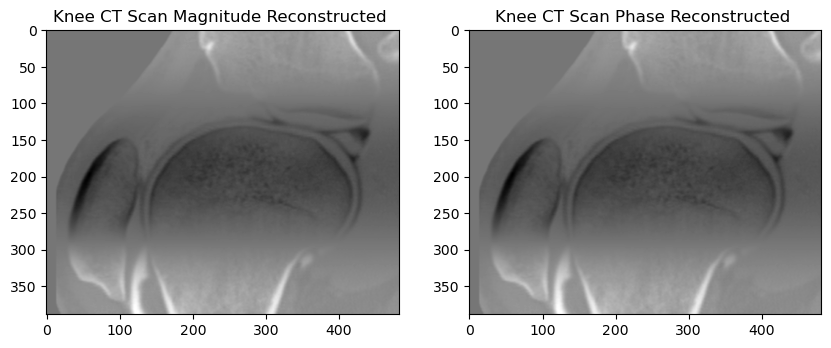

In [6]:
# Read the image
file_name = 'knee_ct2.tif'

image = io.imread(os.path.join(data_directory, file_name))
plt.imshow(image, cmap='gray')
plt.title('Knee CT Scan Original')
plt.show()

# Let's compute the DFT
dft = np.fft.fftshift(np.fft.fft2(image))

mag = np.abs(dft)

mag = np.log(np.abs(dft)+1);
mag = mag / np.log(np.max(np.abs(dft.ravel())+1))

phase = (np.angle(dft) + np.pi) / (2*np.pi);

# Let's compute the inverse DFT
mag_img = np.fft.fft2(np.fft.fftshift(dft))
mag_img = mag_img.astype(np.double)

phase_img = np.fft.fft2(np.fft.fftshift(dft))
phase_img = phase_img.astype(np.double)


# And plot!
plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.imshow(mag_img, cmap='gray'); plt.title('Knee CT Scan Magnitude Reconstructed ')
plt.subplot(1, 2, 2); plt.imshow(phase_img, cmap='gray'); plt.title('Knee CT Scan Phase Reconstructed ')
plt.show()


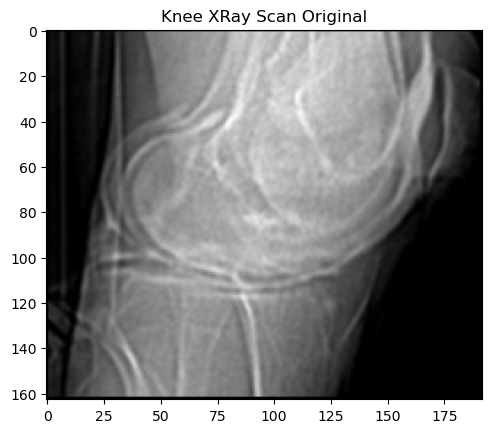

/var/folders/tm/sspyv08j21q74x7dxt8th_l00000gn/T/ipykernel_17022/1696810696.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  mag_img = mag_img.astype(np.double)
/var/folders/tm/sspyv08j21q74x7dxt8th_l00000gn/T/ipykernel_17022/1696810696.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
  phase_img = phase_img.astype(np.double)
/var/folders/tm/sspyv08j21q74x7dxt8th_l00000gn/T/ipykernel_17022/1696810696.py:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1); plt.imshow(mag_img, cmap='gray'); plt.title('Knee XRay Scan Magnitude Reconstructed ')


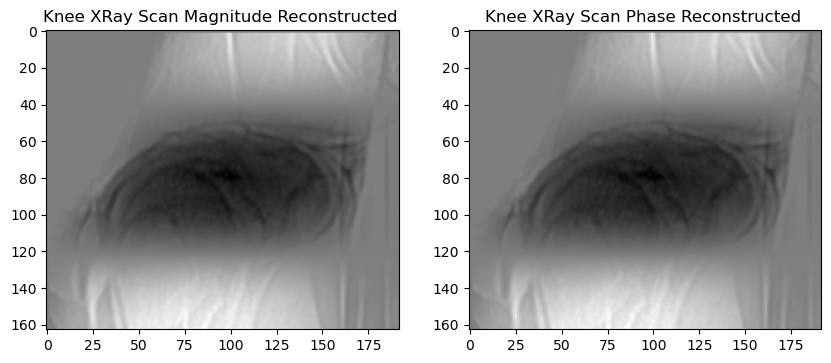

In [7]:
# Read the image
file_name = 'knee_xray2.tif'

image = io.imread(os.path.join(data_directory, file_name))
plt.imshow(image, cmap='gray')
plt.title('Knee XRay Scan Original')
plt.show()

# Let's compute the DFT
dft = np.fft.fftshift(np.fft.fft2(image))

mag = np.abs(dft)

mag = np.log(np.abs(dft)+1);
mag = mag / np.log(np.max(np.abs(dft.ravel())+1))

phase = (np.angle(dft) + np.pi) / (2*np.pi);

# Let's compute the inverse DFT
mag_img = np.fft.fft2(np.fft.fftshift(dft))
mag_img = mag_img.astype(np.double)

phase_img = np.fft.fft2(np.fft.fftshift(dft))
phase_img = phase_img.astype(np.double)


# And plot!
plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.imshow(mag_img, cmap='gray'); plt.title('Knee XRay Scan Magnitude Reconstructed ')
plt.subplot(1, 2, 2); plt.imshow(phase_img, cmap='gray'); plt.title('Knee XRay Scan Phase Reconstructed ')
plt.show()


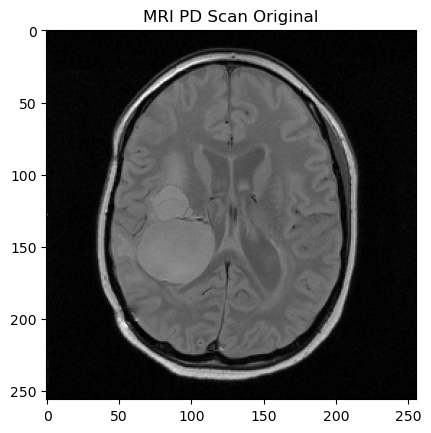

/var/folders/tm/sspyv08j21q74x7dxt8th_l00000gn/T/ipykernel_17022/1727510755.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  mag_img = mag_img.astype(np.double)
/var/folders/tm/sspyv08j21q74x7dxt8th_l00000gn/T/ipykernel_17022/1727510755.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
  phase_img = phase_img.astype(np.double)
/var/folders/tm/sspyv08j21q74x7dxt8th_l00000gn/T/ipykernel_17022/1727510755.py:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1); plt.imshow(mag_img, cmap='gray'); plt.title('MRI PD Scan Magnitude Reconstructed ')


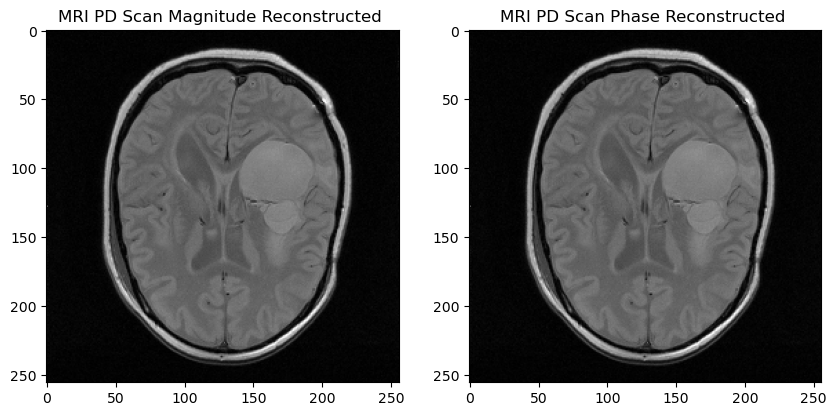

In [8]:
# Read the image
file_name = 'mri_pd.tif'

image = io.imread(os.path.join(data_directory, file_name))
plt.imshow(image, cmap='gray')
plt.title('MRI PD Scan Original')
plt.show()

# Let's compute the DFT
dft = np.fft.fftshift(np.fft.fft2(image))

mag = np.abs(dft)

mag = np.log(np.abs(dft)+1);
mag = mag / np.log(np.max(np.abs(dft.ravel())+1))

phase = (np.angle(dft) + np.pi) / (2*np.pi);

# Let's compute the inverse DFT
mag_img = np.fft.fft2(np.fft.fftshift(dft))
mag_img = mag_img.astype(np.double)

phase_img = np.fft.fft2(np.fft.fftshift(dft))
phase_img = phase_img.astype(np.double)


# And plot!
plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.imshow(mag_img, cmap='gray'); plt.title('MRI PD Scan Magnitude Reconstructed ')
plt.subplot(1, 2, 2); plt.imshow(phase_img, cmap='gray'); plt.title('MRI PD Scan Phase Reconstructed ')
plt.show()


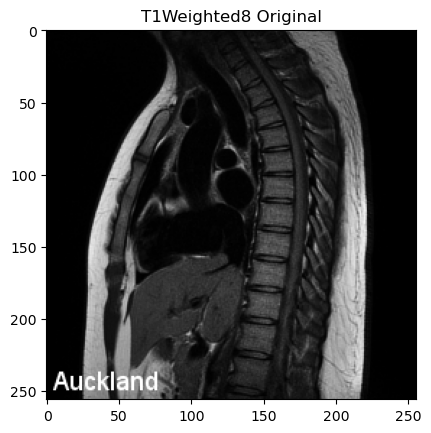

/var/folders/tm/sspyv08j21q74x7dxt8th_l00000gn/T/ipykernel_17022/3010256075.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  mag_img = mag_img.astype(np.double)
/var/folders/tm/sspyv08j21q74x7dxt8th_l00000gn/T/ipykernel_17022/3010256075.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
  phase_img = phase_img.astype(np.double)
/var/folders/tm/sspyv08j21q74x7dxt8th_l00000gn/T/ipykernel_17022/3010256075.py:30: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1); plt.imshow(mag_img, cmap='gray'); plt.title('T1Weighted8 Magnitude Reconstructed ')


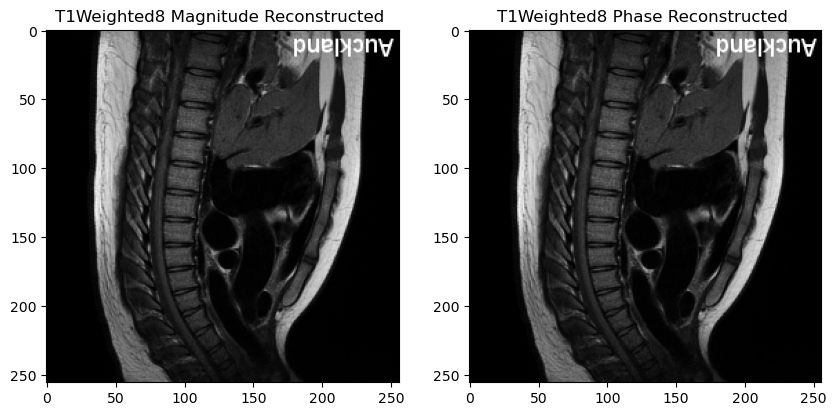

In [9]:
# Read the image
file_name = 'T1Weighted8.jpg'

image = io.imread(os.path.join(data_directory, file_name))
plt.imshow(image, cmap='gray')
plt.title('T1Weighted8 Original')
plt.show()

# Let's compute the DFT
dft = np.fft.fftshift(np.fft.fft2(image))

mag = np.abs(dft)

mag = np.log(np.abs(dft)+1);
mag = mag / np.log(np.max(np.abs(dft.ravel())+1))

phase = (np.angle(dft) + np.pi) / (2*np.pi);

# Let's compute the inverse DFT
mag_img = np.fft.fft2(np.fft.fftshift(dft))
mag_img = mag_img.astype(np.double)

phase_img = np.fft.fft2(np.fft.fftshift(dft))
phase_img = phase_img.astype(np.double)



# And plot!
plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.imshow(mag_img, cmap='gray'); plt.title('T1Weighted8 Magnitude Reconstructed ')
plt.subplot(1, 2, 2); plt.imshow(phase_img, cmap='gray'); plt.title('T1Weighted8 Phase Reconstructed ')
plt.show()


#### Section 4

When reconstructing the image using phase or magnitude, the image will become flipped along an axis. 

When using phase the image appear slightly lighter and this is because for magnitude it takes the absolute value of the dft therfore increasing each frequecy to be higher when it started doing the fourier transformation as the wavelength is smaller in the magnitude as compared to the phase.

## Section 5

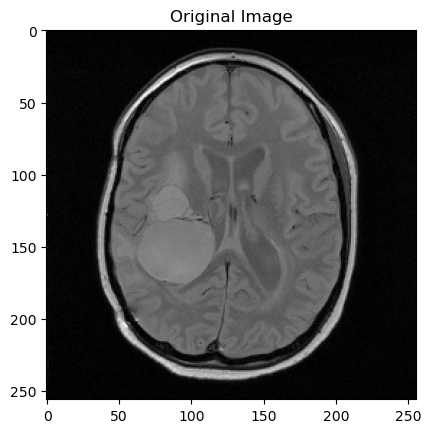

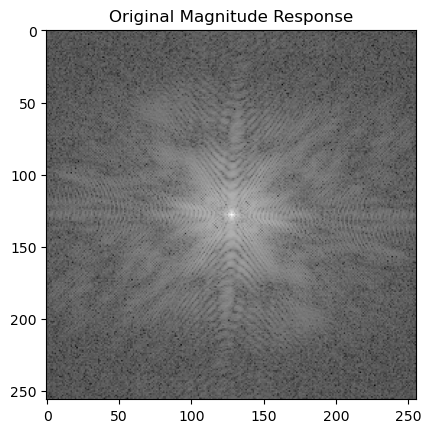

In [10]:
# Read the image
file_name = 'mri_pd2.tif'
image = io.imread(os.path.join(data_directory, file_name))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()



# Let's compute the DFT
dft = np.fft.fftshift(np.fft.fft2(image))

mag = np.abs(dft)


mag = np.log(np.abs(dft)+1);
mag = mag / np.log(np.max(np.abs(dft.ravel())+1))

plt.imshow(mag, cmap='gray')
plt.title('Original Magnitude Response')
plt.show()



/var/folders/tm/sspyv08j21q74x7dxt8th_l00000gn/T/ipykernel_17022/3950816239.py:47: ComplexWarning: Casting complex values to real discards the imaginary part
  image = image.astype(np.double)


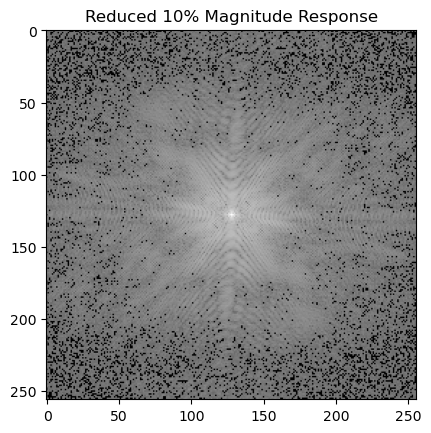

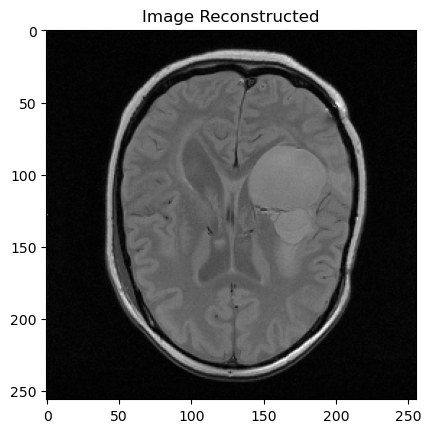

In [11]:
# Read the image
file_name = 'mri_pd2.tif'
image = io.imread(os.path.join(data_directory, file_name))


# Let's compute the DFT
dft = np.fft.fftshift(np.fft.fft2(image))

mag = np.abs(dft)


mag = np.log(np.abs(dft)+1);
mag = mag / np.log(np.max(np.abs(dft.ravel())+1))


rows = mag.shape[0]
columns = mag.shape[1]

# Grab a copy of the magnitude but in a 1d array
# Use mag since its the absolute value so when I need to do it again for the dft I 
# only want the values that are lower or equal to that particular number
flat = mag.flatten('F')

# sort it so that it is in accending order
flat.sort()

# obtain the length to help get what value to stop at
x = len(flat)

# Percentage - will help to get the index values of what I need to be cutoff
x = x * 0.10

# if it is a decimal will just round to the nearest integer
x = round(x)

value_lower = flat[x] # What we aim to get rid of anything equal to or lower will be turned to 0

for i in range(rows):
    for j in range (columns):
        remo = mag[i][j]
        if remo <= value_lower and remo >= (-value_lower): #anything lower then or equal to that value will be turned to 0
            dft[i][j] = 0 # Set those magnitidue values to be 0

            
#Inverser DFT (Discrete Fourier Transformation)
image = np.fft.fft2(np.fft.fftshift(dft))
image = image.astype(np.double)


mag = np.abs(dft)
mag = np.log(np.abs(dft)+1);
mag = mag / np.log(np.max(np.abs(dft.ravel())+1))
mag = mag.astype(np.double)

plt.imshow(mag, cmap='gray')
plt.title('Reduced 10% Magnitude Response')
plt.show()

plt.imshow(image, cmap='gray')
plt.title('Image Reconstructed')
plt.show()


/var/folders/tm/sspyv08j21q74x7dxt8th_l00000gn/T/ipykernel_17022/3992575113.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  image = image.astype(np.double)


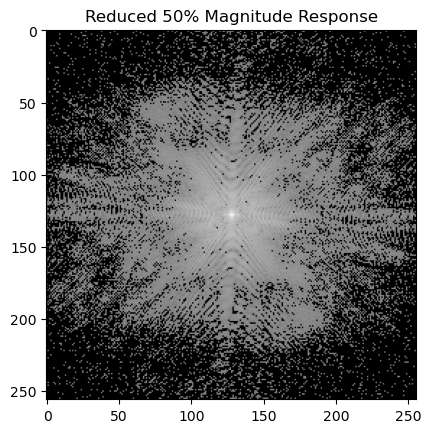

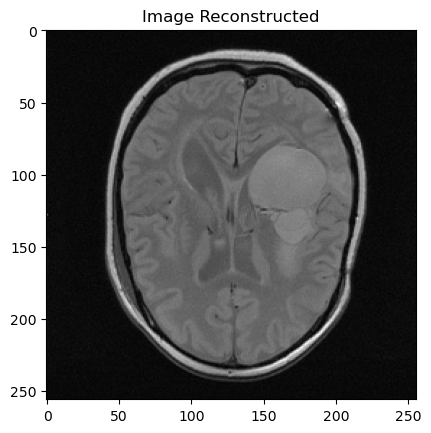

In [12]:
# Read the image
file_name = 'mri_pd2.tif'
image = io.imread(os.path.join(data_directory, file_name))
# plt.imshow(image, cmap='gray')
# plt.show()

# Let's compute the DFT
dft = np.fft.fftshift(np.fft.fft2(image))

mag = np.abs(dft)

mag = np.log(np.abs(dft)+1);
mag = mag / np.log(np.max(np.abs(dft.ravel())+1))

rows = mag.shape[0]
columns = mag.shape[1]

# Grab a copy of the magnitude but in a 1d array
flat = mag.flatten('F')

# sort it so that it is in accending order
flat.sort()

# obtain the length to help get what value to stop at
x = len(flat)

# Percentage - will help to get the index values of what I need to be cutoff
x = x * 0.50

# if it is a decimal will just round to the nearest integer
x = round(x)

value_lower = flat[x] # What we aim to get rid of anything equal to or lower will be turned to 0

for i in range(rows):
    for j in range (columns):
        remo = mag[i][j]
        if remo <= value_lower and remo >= (-value_lower): #anything lower then or equal to that value will be turned to 0
            dft[i][j] = 0 # Set those magnitidue values to be 0

            
#Inverser DFT (Discrete Fourier Transformation)
image = np.fft.fft2(np.fft.fftshift(dft))
image = image.astype(np.double)


mag = np.abs(dft)
mag = np.log(np.abs(dft)+1);
mag = mag / np.log(np.max(np.abs(dft.ravel())+1))
mag = mag.astype(np.double)

plt.imshow(mag, cmap='gray')
plt.title('Reduced 50% Magnitude Response')
plt.show()

plt.imshow(image, cmap='gray')
plt.title('Image Reconstructed')
plt.show()


/var/folders/tm/sspyv08j21q74x7dxt8th_l00000gn/T/ipykernel_17022/3098994954.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  image = image.astype(np.double)


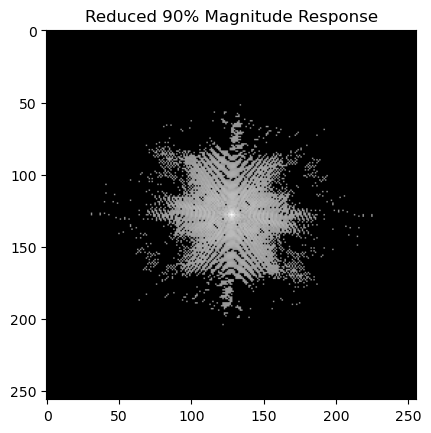

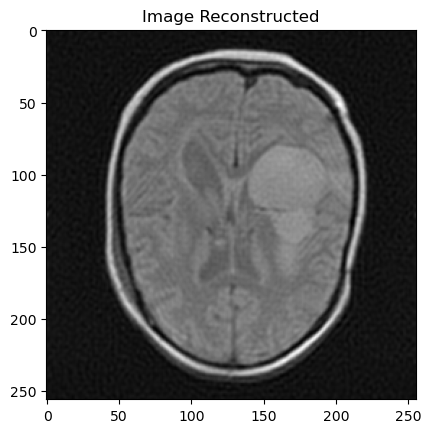

In [13]:
# Read the image
file_name = 'mri_pd2.tif'
image = io.imread(os.path.join(data_directory, file_name))
# plt.imshow(image, cmap='gray')
# plt.show()

# Let's compute the DFT
dft = np.fft.fftshift(np.fft.fft2(image))

mag = np.abs(dft)

mag = np.log(np.abs(dft)+1);
mag = mag / np.log(np.max(np.abs(dft.ravel())+1))

rows = mag.shape[0]
columns = mag.shape[1]

# Grab a copy of the magnitude but in a 1d array
flat = mag.flatten('F')

# sort it so that it is in accending order
flat.sort()

# obtain the length to help get what value to stop at
x = len(flat)

# Percentage - will help to get the index values of what I need to be cutoff
x = x * 0.90

# if it is a decimal will just round to the nearest integer
x = round(x)

value_lower = flat[x] # What we aim to get rid of anything equal to or lower will be turned to 0

for i in range(rows):
    for j in range (columns):
        remo = mag[i][j]
        if remo <= value_lower and remo >= (-value_lower): #anything lower then or equal to that value will be turned to 0
            dft[i][j] = 0 # Set those magnitidue values to be 0

            
#Inverser DFT (Discrete Fourier Transformation)
image = np.fft.fft2(np.fft.fftshift(dft))
image = image.astype(np.double)


mag = np.abs(dft)
mag = np.log(np.abs(dft)+1);
mag = mag / np.log(np.max(np.abs(dft.ravel())+1))
mag = mag.astype(np.double)

plt.imshow(mag, cmap='gray')
plt.title('Reduced 90% Magnitude Response')
plt.show()

plt.imshow(image, cmap='gray')
plt.title('Image Reconstructed')
plt.show()


/var/folders/tm/sspyv08j21q74x7dxt8th_l00000gn/T/ipykernel_17022/1011076532.py:45: ComplexWarning: Casting complex values to real discards the imaginary part
  image = image.astype(np.double)


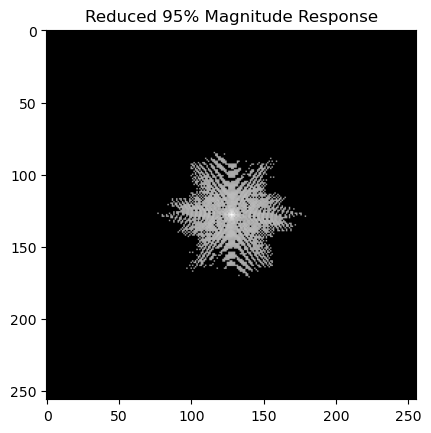

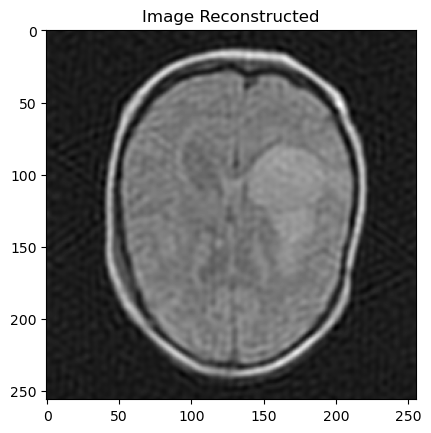

In [14]:
# Read the image
file_name = 'mri_pd2.tif'
image = io.imread(os.path.join(data_directory, file_name))
# plt.imshow(image, cmap='gray')
# plt.show()

# Let's compute the DFT
dft = np.fft.fftshift(np.fft.fft2(image))

mag = np.abs(dft)

mag = np.log(np.abs(dft)+1);
mag = mag / np.log(np.max(np.abs(dft.ravel())+1))

rows = mag.shape[0]
columns = mag.shape[1]

# Grab a copy of the magnitude but in a 1d array
flat = mag.flatten('F')

# sort it so that it is in accending order
flat.sort()

# obtain the length to help get what value to stop at
x = len(flat)

# Percentage - will help to get the index values of what I need to be cutoff
x = x * 0.95

# if it is a decimal will just round to the nearest integer
x = round(x)

value_lower = flat[x] # What we aim to get rid of anything equal to or lower will be turned to 0


for i in range(rows):
    for j in range (columns):
        remo = mag[i][j]
        if remo <= value_lower and remo >= (-value_lower): #anything lower then or equal to that value will be turned to 0
            dft[i][j] = 0 # Set those magnitidue values to be 0

            
#Inverser DFT (Discrete Fourier Transformation)
image = np.fft.fft2(np.fft.fftshift(dft))
image = image.astype(np.double)


mag = np.abs(dft)
mag = np.log(np.abs(dft)+1);
mag = mag / np.log(np.max(np.abs(dft.ravel())+1))
mag = mag.astype(np.double)

plt.imshow(mag, cmap='gray')
plt.title('Reduced 95% Magnitude Response')
plt.show()

plt.imshow(image, cmap='gray')
plt.title('Image Reconstructed')
plt.show()


/var/folders/tm/sspyv08j21q74x7dxt8th_l00000gn/T/ipykernel_17022/1489455885.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  image = image.astype(np.double)


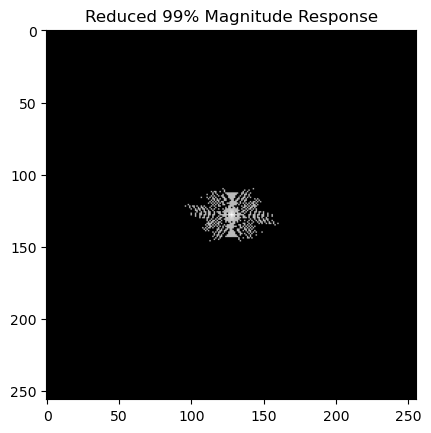

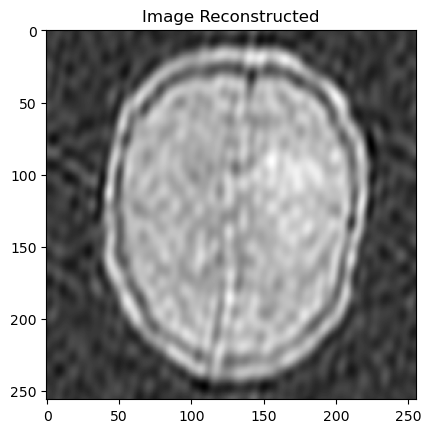

In [15]:
# Read the image
file_name = 'mri_pd2.tif'
image = io.imread(os.path.join(data_directory, file_name))
# plt.imshow(image, cmap='gray')
# plt.show()

# Let's compute the DFT
dft = np.fft.fftshift(np.fft.fft2(image))

mag = np.abs(dft)

mag = np.log(np.abs(dft)+1);
mag = mag / np.log(np.max(np.abs(dft.ravel())+1))

rows = mag.shape[0]
columns = mag.shape[1]

# Grab a copy of the magnitude but in a 1d array
flat = mag.flatten('F')

# sort it so that it is in accending order
flat.sort()

# obtain the length to help get what value to stop at
x = len(flat)

# Percentage - will help to get the index values of what I need to be cutoff
x = x * 0.99

# if it is a decimal will just round to the nearest integer
x = round(x)

value_lower = flat[x] # What we aim to get rid of anything equal to or lower will be turned to 0

for i in range(rows):
    for j in range (columns):
        remo = mag[i][j]
        if remo <= value_lower and remo >= (-value_lower):  #anything lower then or equal to that value will be turned to 0
            dft[i][j] = 0 # Set those magnitidue values to be 0

            
#Inverser DFT (Discrete Fourier Transformation)
image = np.fft.fft2(np.fft.fftshift(dft))
image = image.astype(np.double)


mag = np.abs(dft)
mag = np.log(np.abs(dft)+1);
mag = mag / np.log(np.max(np.abs(dft.ravel())+1))
mag = mag.astype(np.double)

plt.imshow(mag, cmap='gray')
plt.title('Reduced 99% Magnitude Response')
plt.show()

plt.imshow(image, cmap='gray')
plt.title('Image Reconstructed')
plt.show()


#### Section 5

As I remove more of the lower values I am then remvoign the higher frequencies in the image, this is seen with the magnitude response where the center is the lower frequencies and the out are the higher Frequencies. Therefore when remaking the images with the alterations we can see as the percentage increases the graininess increases as well as the details inside of the brain also start to diminish 

## Section 6

/var/folders/tm/sspyv08j21q74x7dxt8th_l00000gn/T/ipykernel_17022/4121543464.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
  H = H.astype(np.double)


<Figure size 640x480 with 0 Axes>

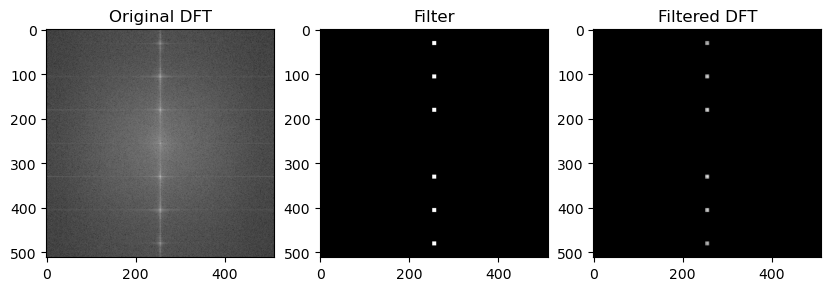

<Figure size 640x480 with 0 Axes>

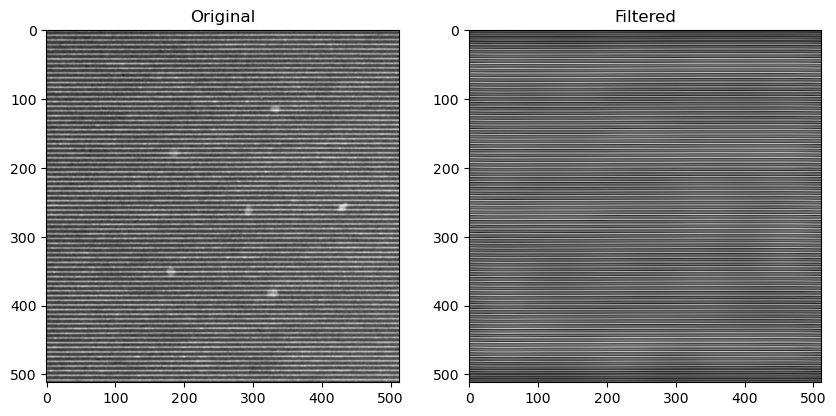

In [16]:
# Read an image
file_name = 'calcs_grids.tiff'
image = io.imread(os.path.join(data_directory, file_name))

# Take the DFT
dft_image = np.fft.fftshift(np.fft.fft2(image))
image_mag = np.log(np.abs(dft_image)+1) / np.log(np.max(np.abs(dft_image.ravel()) + 1))

# Build a low pass filter
# taking out the higher points of frequencies in the magnitude chart by targeting the lower frequenices for all 5
# points in the original chart
H = np.zeros_like(dft_image)
mean = np.array(H.shape) / 2
for i in range(H.shape[0]):
    for j in range(H.shape[1]):
        if np.abs(mean[0] - i) < 5 and np.abs(mean[1] - j) < 5: # center/middle point
            po = H[i, j]    
        if np.abs(mean[0] - i + 75) < 5 and np.abs(mean[1] - j) < 5: # lower points starting closest to the center
            H[i, j] = 1
        if np.abs(mean[0] - i + 150) < 5 and np.abs(mean[1] - j) < 5: 
            H[i, j] = 1
        if np.abs(mean[0] - i + 225) < 5 and np.abs(mean[1] - j) < 5: 
            H[i, j] = 1
        if np.abs(mean[0] - i - 75) < 5 and np.abs(mean[1] - j) < 5: # Higher points starting closest to the center
            H[i, j] = 1
        if np.abs(mean[0] - i - 150) < 5 and np.abs(mean[1] - j) < 5: 
            H[i, j] = 1
        if np.abs(mean[0] - i - 225) < 5 and np.abs(mean[1] - j) < 5: 
            H[i, j] = 1
H = H.astype(np.double)

# Apply the filter
new_image_dft = dft_image * H
new_image_mag = np.log(np.abs(new_image_dft)+1) / np.log(np.max(np.abs(new_image_dft.ravel()) + 1))

# Recovery the image
new_image = np.fft.ifft2(np.fft.fftshift(new_image_dft))
new_image = np.abs(new_image)

# Plot
plt.figure(1)
plt.subplots(1, 3, figsize=(10, 10))
plt.subplot(1, 3, 1); plt.imshow(image_mag, cmap='gray'); plt.title('Original DFT')
plt.subplot(1, 3, 2); plt.imshow(H, cmap='gray'); plt.title('Filter')
plt.subplot(1, 3, 3); plt.imshow(new_image_mag, cmap='gray'); plt.title('Filtered DFT')
plt.show()


plt.figure(2)
plt.subplots(1, 2, figsize=(10, 10))
plt.subplot(1, 2, 1); plt.imshow(image, cmap='gray'); plt.title('Original')
plt.subplot(1, 2, 2); plt.imshow(new_image, cmap='gray'); plt.title('Filtered')
plt.show()

#### Section 6

When Removing the 6 dots from the original image I decided to reduce it by targeting each point where there was a higher intensity of low frequency in the magnitude response that was not the middle point, The other middle 2 points being (0,-u) and (0,u) and then the one on top of them being the negative. The very top being (0, -3u), so from top to bottom it would be (0,-3u), (0,-2u), (0,-u), (0,u), (0,2u), and (0,3u) from the filtered DFT Graph.

I was able to successfully remove the 6 dotted point on the image as I applied a low pass filter on the image however some details and the graininess of the image is not there. This is because of the elimination of the higher frequencies now being gone. However because the objective was to remove the artifacts I removed the middle "point" in the dft filter and if I were to add it back again the image and its lines would become much more distinct as I have added more lower frequencies thus giving the reconstruction more information to produce an image. 

## Conclusion:


In this Lab we became familiar with the frequency domain of images using Discrete Fourier Transformations (DFT).

The first section focused on calculating and displaying the components of an image and understanding that scaling is required if we want to be able to visualize meaningful results for the real, imaginary, magnitude, and phase components. 

The Second Section Demonstrated the ability to recreate an image when given the magnitude or phase components using the inverse DFT and how the images can appear differently from the original image. 

Third Section we were able to see how if you remove the smallest values of the magnitude and then recreate them the higher frequencies will get eliminated thus removing more detail as you increase the amount of lower magnitudes you take away.

The Final section we built a low pass filter to remove artifacts by targeting them in the magnitude graph and then removing the higher frequencies by creating small boxes that focus solely on the lower frequencies and get rid of the higher frequencies/lower magnitudes. 

Ultimately this Lab showed us how to calculate, display, manipulate components, and as well as creating filters for the images to remove artifacts in images. 